In [ ]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline


# Data Preprocessing

In [ ]:
df = pd.read_excel("WPKL_Residential_2017to2021.xlsx")
df

,STATE,DAERAH1,MUKIM1,TKH_NILAI,UNIT_LUAS_LOT,LUAS_LOT,CATEGORY,SECTOR,PRO_TYPE,B_TINGKAT,ALAMAT,SKIM,SYER1,HARGA_B,YEAR
0,Kuala Lumpur,Kuala Lumpur Town Centre,NaN,2018-03-30,mp,52.0,Flat,Residential,Flat,5.0,"85-03-09,BANDAR BARU SENTUL",PANGSAPURI BANDAR BARU SENTUL,1,10000,2018
1,Kuala Lumpur,Mukim Setapak,NaN,2021-02-08,mp,125.0,Condominium/Apartment,Residential,Condominium/Apartment,20.0,"B-04-06,JLN WANGSA PERDANA 3",DESA PUTRA,1,10000,2021
2,Kuala Lumpur,Mukim Petaling,NaN,2020-12-05,mp,3.0,Vacant Residential Plot,Residential,Vacant Plot,NaN,"45,JALAN WAN MALINI 2",BANDAR BARU SRI PETALING,1,12000,2020
3,Kuala Lumpur,Kuala Lumpur Town Centre,NaN,2017-07-18,mp,38.0,Low-Cost Flat,Residential,Low-Cost Flat,4.0,"40A,OFF JLN TUN RAZAK",FLAT PKNS JLN PEKELILING,1,14000,2017
4,Kuala Lumpur,Kuala Lumpur Town Centre,NaN,2019-08-15,mp,101.0,Flat,Residential,Flat,4.0,"26-C,JLN LOKE YEW",JALAN LOKE YEW,1,15000,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33736,Kuala Lumpur,Mukim Ulu Kelang,NaN,2019-04-09,mp,18869.0,Vacant Residential Plot,Residential,Vacant Plot,NaN,"1283,JALAN TAMAN SETIAWANGSA",TMN SETIAWANGSA,1,43484000,2019
33737,Kuala Lumpur,Kuala Lumpur Town Centre,NaN,2018-04-03,mp,4237.0,Detached House,Residential,Detached,3.0,"1,JALAN TIJANI 1",TIJANI BUKIT TUNKU,1,45680000,2018
33738,Kuala Lumpur,Mukim Batu,NaN,2019-11-06,mp,54211.0,Vacant Residential Plot,Residential,Vacant Plot,NaN,"LOT 65630,PERSIARAN TECOMA",COUNTRY HEIGHTS DAMANSARA,1,54250000,2019
33739,Kuala Lumpur,Mukim Setapak,NaN,2019-08-06,mp,18273.0,Vacant Residential Plot,Residential,Vacant Plot,NaN,"201522,JALAN WANGSA MELAWATI 1",WANGSA MELAWATI,1,61974077,2019


In [ ]:
mukim_setapak = df.loc[df["DAERAH1"].str.contains("Mukim Setapak", case=True)]
mukim_setapak

,STATE,DAERAH1,MUKIM1,TKH_NILAI,UNIT_LUAS_LOT,LUAS_LOT,CATEGORY,SECTOR,PRO_TYPE,B_TINGKAT,ALAMAT,SKIM,SYER1,HARGA_B,YEAR
1,Kuala Lumpur,Mukim Setapak,NaN,2021-02-08,mp,125.0,Condominium/Apartment,Residential,Condominium/Apartment,20.0,"B-04-06,JLN WANGSA PERDANA 3",DESA PUTRA,1,10000,2021
10,Kuala Lumpur,Mukim Setapak,NaN,2017-03-03,mp,52.0,Flat,Residential,Flat,5.0,"8-1-29,OFF JALAN GOMBAK",PANGSAPURI BANDARAYA GOMBAK,1,22000,2017
11,Kuala Lumpur,Mukim Setapak,NaN,2017-01-20,mp,39.0,Low-Cost Flat,Residential,Low-Cost Flat,17.0,"162-14A,JALAN SENTUL",PERUMAHAN AWAM SERI KELANTAN,1,22600,2017
12,Kuala Lumpur,Mukim Setapak,NaN,2017-10-02,mp,39.0,Low-Cost Flat,Residential,Low-Cost Flat,17.0,"162-5D,JALAN SENTUL",PERUMAHAN AWAM SERI KELANTAN,1,22600,2017
13,Kuala Lumpur,Mukim Setapak,NaN,2017-04-20,mp,39.0,Low-Cost Flat,Residential,Low-Cost Flat,17.0,"160-1P,JALAN SENTUL",PERUMAHAN AWAM SERI KELANTAN,1,22600,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33729,Kuala Lumpur,Mukim Setapak,NaN,2018-04-23,mp,9740.0,Vacant Residential Plot,Residential,Vacant Plot,NaN,"3163,JALAN SENTUL PASAR",JALAN SENTUL PASAR,1,27773325,2018
33730,Kuala Lumpur,Mukim Setapak,NaN,2019-08-03,mp,8238.0,Vacant Residential Plot,Residential,Vacant Plot,NaN,"201438,JALAN DATO SENU",JALAN SENTUL,1,29000000,2019
33732,Kuala Lumpur,Mukim Setapak,NaN,2018-04-23,mp,11200.0,Vacant Residential Plot,Residential,Vacant Plot,NaN,"4056,OFF JALAN SENTUL PASAR",JALAN SENTUL PASAR,1,31963505,2018
33734,Kuala Lumpur,Mukim Setapak,NaN,2018-04-23,mp,12570.0,Vacant Residential Plot,Residential,Vacant Plot,NaN,"4055,JALAN SENTUL PASAR",JALAN SENTUL PASAR,1,35853440,2018


In [ ]:
mukim_setapak[['UNIT_LUAS_LOT']] = mukim_setapak[['UNIT_LUAS_LOT']].fillna('mp')
mukim_setapak

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,STATE,DAERAH1,MUKIM1,TKH_NILAI,UNIT_LUAS_LOT,LUAS_LOT,CATEGORY,SECTOR,PRO_TYPE,B_TINGKAT,ALAMAT,SKIM,SYER1,HARGA_B,YEAR
1,Kuala Lumpur,Mukim Setapak,NaN,2021-02-08,mp,125.0,Condominium/Apartment,Residential,Condominium/Apartment,20.0,"B-04-06,JLN WANGSA PERDANA 3",DESA PUTRA,1,10000,2021
10,Kuala Lumpur,Mukim Setapak,NaN,2017-03-03,mp,52.0,Flat,Residential,Flat,5.0,"8-1-29,OFF JALAN GOMBAK",PANGSAPURI BANDARAYA GOMBAK,1,22000,2017
11,Kuala Lumpur,Mukim Setapak,NaN,2017-01-20,mp,39.0,Low-Cost Flat,Residential,Low-Cost Flat,17.0,"162-14A,JALAN SENTUL",PERUMAHAN AWAM SERI KELANTAN,1,22600,2017
12,Kuala Lumpur,Mukim Setapak,NaN,2017-10-02,mp,39.0,Low-Cost Flat,Residential,Low-Cost Flat,17.0,"162-5D,JALAN SENTUL",PERUMAHAN AWAM SERI KELANTAN,1,22600,2017
13,Kuala Lumpur,Mukim Setapak,NaN,2017-04-20,mp,39.0,Low-Cost Flat,Residential,Low-Cost Flat,17.0,"160-1P,JALAN SENTUL",PERUMAHAN AWAM SERI KELANTAN,1,22600,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33729,Kuala Lumpur,Mukim Setapak,NaN,2018-04-23,mp,9740.0,Vacant Residential Plot,Residential,Vacant Plot,NaN,"3163,JALAN SENTUL PASAR",JALAN SENTUL PASAR,1,27773325,2018
33730,Kuala Lumpur,Mukim Setapak,NaN,2019-08-03,mp,8238.0,Vacant Residential Plot,Residential,Vacant Plot,NaN,"201438,JALAN DATO SENU",JALAN SENTUL,1,29000000,2019
33732,Kuala Lumpur,Mukim Setapak,NaN,2018-04-23,mp,11200.0,Vacant Residential Plot,Residential,Vacant Plot,NaN,"4056,OFF JALAN SENTUL PASAR",JALAN SENTUL PASAR,1,31963505,2018
33734,Kuala Lumpur,Mukim Setapak,NaN,2018-04-23,mp,12570.0,Vacant Residential Plot,Residential,Vacant Plot,NaN,"4055,JALAN SENTUL PASAR",JALAN SENTUL PASAR,1,35853440,2018


In [ ]:
mukim_setapak[['B_TINGKAT']] = mukim_setapak[['B_TINGKAT']].fillna(0)
mukim_setapak

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,STATE,DAERAH1,MUKIM1,TKH_NILAI,UNIT_LUAS_LOT,LUAS_LOT,CATEGORY,SECTOR,PRO_TYPE,B_TINGKAT,ALAMAT,SKIM,SYER1,HARGA_B,YEAR
1,Kuala Lumpur,Mukim Setapak,NaN,2021-02-08,mp,125.0,Condominium/Apartment,Residential,Condominium/Apartment,20.0,"B-04-06,JLN WANGSA PERDANA 3",DESA PUTRA,1,10000,2021
10,Kuala Lumpur,Mukim Setapak,NaN,2017-03-03,mp,52.0,Flat,Residential,Flat,5.0,"8-1-29,OFF JALAN GOMBAK",PANGSAPURI BANDARAYA GOMBAK,1,22000,2017
11,Kuala Lumpur,Mukim Setapak,NaN,2017-01-20,mp,39.0,Low-Cost Flat,Residential,Low-Cost Flat,17.0,"162-14A,JALAN SENTUL",PERUMAHAN AWAM SERI KELANTAN,1,22600,2017
12,Kuala Lumpur,Mukim Setapak,NaN,2017-10-02,mp,39.0,Low-Cost Flat,Residential,Low-Cost Flat,17.0,"162-5D,JALAN SENTUL",PERUMAHAN AWAM SERI KELANTAN,1,22600,2017
13,Kuala Lumpur,Mukim Setapak,NaN,2017-04-20,mp,39.0,Low-Cost Flat,Residential,Low-Cost Flat,17.0,"160-1P,JALAN SENTUL",PERUMAHAN AWAM SERI KELANTAN,1,22600,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33729,Kuala Lumpur,Mukim Setapak,NaN,2018-04-23,mp,9740.0,Vacant Residential Plot,Residential,Vacant Plot,0.0,"3163,JALAN SENTUL PASAR",JALAN SENTUL PASAR,1,27773325,2018
33730,Kuala Lumpur,Mukim Setapak,NaN,2019-08-03,mp,8238.0,Vacant Residential Plot,Residential,Vacant Plot,0.0,"201438,JALAN DATO SENU",JALAN SENTUL,1,29000000,2019
33732,Kuala Lumpur,Mukim Setapak,NaN,2018-04-23,mp,11200.0,Vacant Residential Plot,Residential,Vacant Plot,0.0,"4056,OFF JALAN SENTUL PASAR",JALAN SENTUL PASAR,1,31963505,2018
33734,Kuala Lumpur,Mukim Setapak,NaN,2018-04-23,mp,12570.0,Vacant Residential Plot,Residential,Vacant Plot,0.0,"4055,JALAN SENTUL PASAR",JALAN SENTUL PASAR,1,35853440,2018


In [ ]:
# Drop all columns with NaN values
df2=mukim_setapak.dropna(axis=1)
df2


,STATE,DAERAH1,TKH_NILAI,UNIT_LUAS_LOT,LUAS_LOT,CATEGORY,SECTOR,PRO_TYPE,B_TINGKAT,ALAMAT,SKIM,SYER1,HARGA_B,YEAR
1,Kuala Lumpur,Mukim Setapak,2021-02-08,mp,125.0,Condominium/Apartment,Residential,Condominium/Apartment,20.0,"B-04-06,JLN WANGSA PERDANA 3",DESA PUTRA,1,10000,2021
10,Kuala Lumpur,Mukim Setapak,2017-03-03,mp,52.0,Flat,Residential,Flat,5.0,"8-1-29,OFF JALAN GOMBAK",PANGSAPURI BANDARAYA GOMBAK,1,22000,2017
11,Kuala Lumpur,Mukim Setapak,2017-01-20,mp,39.0,Low-Cost Flat,Residential,Low-Cost Flat,17.0,"162-14A,JALAN SENTUL",PERUMAHAN AWAM SERI KELANTAN,1,22600,2017
12,Kuala Lumpur,Mukim Setapak,2017-10-02,mp,39.0,Low-Cost Flat,Residential,Low-Cost Flat,17.0,"162-5D,JALAN SENTUL",PERUMAHAN AWAM SERI KELANTAN,1,22600,2017
13,Kuala Lumpur,Mukim Setapak,2017-04-20,mp,39.0,Low-Cost Flat,Residential,Low-Cost Flat,17.0,"160-1P,JALAN SENTUL",PERUMAHAN AWAM SERI KELANTAN,1,22600,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33729,Kuala Lumpur,Mukim Setapak,2018-04-23,mp,9740.0,Vacant Residential Plot,Residential,Vacant Plot,0.0,"3163,JALAN SENTUL PASAR",JALAN SENTUL PASAR,1,27773325,2018
33730,Kuala Lumpur,Mukim Setapak,2019-08-03,mp,8238.0,Vacant Residential Plot,Residential,Vacant Plot,0.0,"201438,JALAN DATO SENU",JALAN SENTUL,1,29000000,2019
33732,Kuala Lumpur,Mukim Setapak,2018-04-23,mp,11200.0,Vacant Residential Plot,Residential,Vacant Plot,0.0,"4056,OFF JALAN SENTUL PASAR",JALAN SENTUL PASAR,1,31963505,2018
33734,Kuala Lumpur,Mukim Setapak,2018-04-23,mp,12570.0,Vacant Residential Plot,Residential,Vacant Plot,0.0,"4055,JALAN SENTUL PASAR",JALAN SENTUL PASAR,1,35853440,2018


In [ ]:
#hide house number
df2['ALAMAT'] = df2['ALAMAT'].replace(r'^\d{4}', "#####", regex=True)
df2['ALAMAT'] = df2['ALAMAT'].replace(r'^\d{4}', "####", regex=True)
df2['ALAMAT'] = df2['ALAMAT'].replace(r'^\d{3}', "###", regex=True)
df2['ALAMAT'] = df2['ALAMAT'].replace(r'^\d{1}-\d{1}-\d{2}', "#-#-##", regex=True)
df2['ALAMAT'] = df2['ALAMAT'].replace(r'^\d{2}-\d{2}-\d{2}', "##-#-##", regex=True)
df2['ALAMAT'] = df2['ALAMAT'].str.replace(r"^[A-Z]-", "#",regex=True)
df2

<ipython-input-46-3181065b5025>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ALAMAT'] = df2['ALAMAT'].replace(r'^\d{4}', "#####", regex=True)
<ipython-input-46-3181065b5025>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ALAMAT'] = df2['ALAMAT'].replace(r'^\d{4}', "####", regex=True)
<ipython-input-46-3181065b5025>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,STATE,DAERAH1,TKH_NILAI,UNIT_LUAS_LOT,LUAS_LOT,CATEGORY,SECTOR,PRO_TYPE,B_TINGKAT,ALAMAT,SKIM,SYER1,HARGA_B,YEAR
1,Kuala Lumpur,Mukim Setapak,2021-02-08,mp,125.0,Condominium/Apartment,Residential,Condominium/Apartment,20.0,"#04-06,JLN WANGSA PERDANA 3",DESA PUTRA,1,10000,2021
10,Kuala Lumpur,Mukim Setapak,2017-03-03,mp,52.0,Flat,Residential,Flat,5.0,"#-#-##,OFF JALAN GOMBAK",PANGSAPURI BANDARAYA GOMBAK,1,22000,2017
11,Kuala Lumpur,Mukim Setapak,2017-01-20,mp,39.0,Low-Cost Flat,Residential,Low-Cost Flat,17.0,"###-14A,JALAN SENTUL",PERUMAHAN AWAM SERI KELANTAN,1,22600,2017
12,Kuala Lumpur,Mukim Setapak,2017-10-02,mp,39.0,Low-Cost Flat,Residential,Low-Cost Flat,17.0,"###-5D,JALAN SENTUL",PERUMAHAN AWAM SERI KELANTAN,1,22600,2017
13,Kuala Lumpur,Mukim Setapak,2017-04-20,mp,39.0,Low-Cost Flat,Residential,Low-Cost Flat,17.0,"###-1P,JALAN SENTUL",PERUMAHAN AWAM SERI KELANTAN,1,22600,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33729,Kuala Lumpur,Mukim Setapak,2018-04-23,mp,9740.0,Vacant Residential Plot,Residential,Vacant Plot,0.0,"#####,JALAN SENTUL PASAR",JALAN SENTUL PASAR,1,27773325,2018
33730,Kuala Lumpur,Mukim Setapak,2019-08-03,mp,8238.0,Vacant Residential Plot,Residential,Vacant Plot,0.0,"#####38,JALAN DATO SENU",JALAN SENTUL,1,29000000,2019
33732,Kuala Lumpur,Mukim Setapak,2018-04-23,mp,11200.0,Vacant Residential Plot,Residential,Vacant Plot,0.0,"#####,OFF JALAN SENTUL PASAR",JALAN SENTUL PASAR,1,31963505,2018
33734,Kuala Lumpur,Mukim Setapak,2018-04-23,mp,12570.0,Vacant Residential Plot,Residential,Vacant Plot,0.0,"#####,JALAN SENTUL PASAR",JALAN SENTUL PASAR,1,35853440,2018



# Research Question

## Causal Question

"Does the higher floor unit for non vacant plot flat and condominium result in the higher price demand for the unit?"

In [ ]:
#only take the column with Condominium/Apartment','Flat', 'Low-Cost Flat as our data

df3=df2[df2['PRO_TYPE'].isin(['Condominium/Apartment','Flat', 'Low-Cost Flat'])]
df3

In [ ]:
#extract certain column
unit_floor=df3[['SKIM', 'B_TINGKAT', 'HARGA_B']]
unit_floor = unit_floor.sort_values(by=['B_TINGKAT'],ascending=True)
unit_floor

## Data Visualisation

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.regplot(x='B_TINGKAT', y='HARGA_B', data=unit_floor, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

In [ ]:
plt.figure(figsize=(25,5))    
ax = sns.barplot(unit_floor['B_TINGKAT'], unit_floor['HARGA_B'],ci = None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=7)
ax.set(xlabel='B_TINGKAT', ylabel='HARGA_B')
plt.title('Price according to the unit floor')
plt.show()

Graph divided by property type


Property Type : Condominium/Apartment

In [ ]:
df_condo_apart=df2[df2['PRO_TYPE'].isin(['Condominium/Apartment'])]
df_condo_apart

,STATE,DAERAH1,TKH_NILAI,UNIT_LUAS_LOT,LUAS_LOT,CATEGORY,SECTOR,PRO_TYPE,B_TINGKAT,ALAMAT,SKIM,SYER1,HARGA_B,YEAR
1,Kuala Lumpur,Mukim Setapak,2021-02-08,mp,125.000,Condominium/Apartment,Residential,Condominium/Apartment,20.0,"B-04-06,JLN WANGSA PERDANA 3",DESA PUTRA,1,10000,2021
699,Kuala Lumpur,Mukim Setapak,2020-12-16,mp,71.000,Condominium/Apartment,Residential,Condominium/Apartment,16.0,"C-12A-2,JLN SENTUL",VILLA ANGKASA,1,50000,2020
775,Kuala Lumpur,Mukim Setapak,2017-01-03,mp,101.000,Condominium/Apartment,Residential,Condominium/Apartment,21.0,"200-3-14,JLN KG BDR DLM",SRI SUAJAYA KONDO,1,70000,2017
777,Kuala Lumpur,Mukim Setapak,2017-01-03,mp,101.000,Condominium/Apartment,Residential,Condominium/Apartment,21.0,"200-3-14,JLN KG BDR DLM",SRI SUAJAYA KONDO,1,70000,2017
920,Kuala Lumpur,Mukim Setapak,2018-07-20,mp,76.000,Condominium/Apartment,Residential,Condominium/Apartment,4.0,"NO 25,JALAN TAMAN MELATI 1",KENARI APT,1,81500,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30263,Kuala Lumpur,Mukim Setapak,2020-09-28,mp,306.106,Condominium/Apartment,Residential,Condominium/Apartment,22.0,"20-1,JALAN PRIMA SETAPAK 7",100 RESIDENSI,1,1718000,2020
30265,Kuala Lumpur,Mukim Setapak,2018-03-03,mp,211.000,Condominium/Apartment,Residential,Condominium/Apartment,30.0,"A-20-3A,JLN MELATI KUARZA 2",THE VEO,1,1718888,2018
30392,Kuala Lumpur,Mukim Setapak,2020-09-29,mp,662.000,Condominium/Apartment,Residential,Condominium/Apartment,26.0,"A-25-3A,JALAN MELATI UTAMA",PLATINUM HILL CONDO PV8,1,1750000,2020
30576,Kuala Lumpur,Mukim Setapak,2020-01-22,mp,308.000,Condominium/Apartment,Residential,Condominium/Apartment,27.0,"A-35-1,JLN WANGSA DELIMA 7",RIANA GREEN EAST KL,1,1800000,2020


In [ ]:
fig = plt.figure(figsize=(5,5))
sns.regplot(x='B_TINGKAT', y='HARGA_B', data=df_condo_apart, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

In [ ]:
plt.figure(figsize=(20,5))    
ax = sns.barplot(df_condo_apart['B_TINGKAT'], df_condo_apart['HARGA_B'],ci = None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=7)
ax.set(xlabel='B_TINGKAT', ylabel='HARGA_B')
plt.title('Price according to the unit floor for Condominium/Apartment')
plt.show()

Property Type : Flat

In [ ]:
df_flat=df2[df2['PRO_TYPE'].isin(['Flat'])]
df_flat

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.regplot(x='B_TINGKAT', y='HARGA_B', data=df_flat, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

In [ ]:
plt.figure(figsize=(10,3))    
ax = sns.barplot(df_flat['B_TINGKAT'], df_flat['HARGA_B'],ci = None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=7)
ax.set(xlabel='B_TINGKAT', ylabel='HARGA_B')
plt.title('Price according to the unit floor for Flat')
plt.show()

Property Type : Low-Cost Flat

In [ ]:
df_los_cost_flat=df2[df2['PRO_TYPE'].isin(['Low-Cost Flat'])]
df_los_cost_flat

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.regplot(x='B_TINGKAT', y='HARGA_B', data=df_los_cost_flat, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

In [ ]:
plt.figure(figsize=(7,3))    
ax = sns.barplot(df_los_cost_flat['B_TINGKAT'], df_los_cost_flat['HARGA_B'],ci = None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=7)
ax.set(xlabel='B_TINGKAT', ylabel='HARGA_B')
plt.title('Price according to the unit floor for Low-cost Flat')
plt.show()

## Descriptive Question

"Which year has the highest net price per square meter?"

In [ ]:
#Add a new column "HARGA_PERSEGI" which is HARGA_B/LUAS LOT
df2['HARGA_PERSEGI'] = (df2['HARGA_B']/df2['LUAS_LOT']).round(2)
df2

,STATE,DAERAH1,TKH_NILAI,UNIT_LUAS_LOT,LUAS_LOT,CATEGORY,SECTOR,PRO_TYPE,B_TINGKAT,ALAMAT,SKIM,SYER1,HARGA_B,YEAR,HARGA_PERSEGI
1,Kuala Lumpur,Mukim Setapak,2021-02-08,mp,125.0,Condominium/Apartment,Residential,Condominium/Apartment,20.0,"B-04-06,JLN WANGSA PERDANA 3",DESA PUTRA,1,10000,2021,80.00
10,Kuala Lumpur,Mukim Setapak,2017-03-03,mp,52.0,Flat,Residential,Flat,5.0,"8-1-29,OFF JALAN GOMBAK",PANGSAPURI BANDARAYA GOMBAK,1,22000,2017,423.08
11,Kuala Lumpur,Mukim Setapak,2017-01-20,mp,39.0,Low-Cost Flat,Residential,Low-Cost Flat,17.0,"162-14A,JALAN SENTUL",PERUMAHAN AWAM SERI KELANTAN,1,22600,2017,579.49
12,Kuala Lumpur,Mukim Setapak,2017-10-02,mp,39.0,Low-Cost Flat,Residential,Low-Cost Flat,17.0,"162-5D,JALAN SENTUL",PERUMAHAN AWAM SERI KELANTAN,1,22600,2017,579.49
13,Kuala Lumpur,Mukim Setapak,2017-04-20,mp,39.0,Low-Cost Flat,Residential,Low-Cost Flat,17.0,"160-1P,JALAN SENTUL",PERUMAHAN AWAM SERI KELANTAN,1,22600,2017,579.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33729,Kuala Lumpur,Mukim Setapak,2018-04-23,mp,9740.0,Vacant Residential Plot,Residential,Vacant Plot,0.0,"3163,JALAN SENTUL PASAR",JALAN SENTUL PASAR,1,27773325,2018,2851.47
33730,Kuala Lumpur,Mukim Setapak,2019-08-03,mp,8238.0,Vacant Residential Plot,Residential,Vacant Plot,0.0,"201438,JALAN DATO SENU",JALAN SENTUL,1,29000000,2019,3520.27
33732,Kuala Lumpur,Mukim Setapak,2018-04-23,mp,11200.0,Vacant Residential Plot,Residential,Vacant Plot,0.0,"4056,OFF JALAN SENTUL PASAR",JALAN SENTUL PASAR,1,31963505,2018,2853.88
33734,Kuala Lumpur,Mukim Setapak,2018-04-23,mp,12570.0,Vacant Residential Plot,Residential,Vacant Plot,0.0,"4055,JALAN SENTUL PASAR",JALAN SENTUL PASAR,1,35853440,2018,2852.30


In [ ]:
#sort and clean 
highYear = df2[['YEAR','HARGA_PERSEGI']]
highYear = highYear.sort_values(by=['YEAR'], ascending = True)
highYear.replace([np.inf, - np.inf], np.nan, inplace = True)
highYear = highYear.dropna()
highYear

,YEAR,HARGA_PERSEGI
14490,2017,3596.49
20446,2017,5980.15
20448,2017,4838.71
20449,2017,4838.71
20459,2017,5022.22
...,...,...
6655,2021,3507.46
20938,2021,3704.82
20887,2021,6100.00
6856,2021,3037.97


In [ ]:
#Dateframe that shows average price per square by year
dfYear = highYear.groupby(by=['YEAR'])['HARGA_PERSEGI'].mean().round(2).reset_index(name = "PURATA_HARGA_PERSEGI")
dfYear

,YEAR,PURATA_HARGA_PERSEGI
0,2017,4206.41
1,2018,4007.54
2,2019,4408.58
3,2020,4336.08
4,2021,4275.42


## Data Visualisation

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


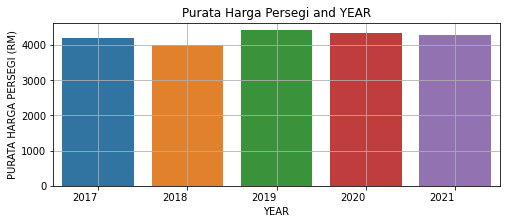

In [ ]:
plt.figure(figsize=(8,3))    
ax = sns.barplot(dfYear['YEAR'], dfYear['PURATA_HARGA_PERSEGI'])
ax.set_xticklabels(ax.get_xticklabels(),  ha="right", fontsize=10)
ax.set(xlabel='YEAR', ylabel='PURATA HARGA PERSEGI (RM)',title='Purata Harga Persegi and YEAR')
plt.grid()
plt.show()

## Mechanistic Question

"How the lot area can affect the net price per square meter of a property?"

In [ ]:
#Dataframe that shows PRO_TYPE and HARGA_PERSEGI
pArea = df2[['LUAS_LOT','HARGA_PERSEGI']]
pArea = pArea.sort_values(by=['LUAS_LOT'], ascending = True)
pArea

,LUAS_LOT,HARGA_PERSEGI
29948,0.0,inf
4975,0.0,inf
3343,0.0,inf
12916,0.0,inf
24272,0.0,inf
...,...,...
33732,11200.0,2853.88
33734,12570.0,2852.30
33739,18273.0,3391.57
6334,27518.0,8.36


In [ ]:
pArea = df2[['LUAS_LOT','HARGA_PERSEGI']]
pArea = pArea.sort_values(by=['LUAS_LOT'], ascending = True)
pArea.replace([np.inf, - np.inf], np.nan, inplace = True)
pArea = pArea.dropna()
pArea

,LUAS_LOT,HARGA_PERSEGI
21106,10.405,60067.28
6263,16.550,13595.17
30276,23.500,73319.15
20748,29.000,20689.66
701,29.000,1793.10
...,...,...
33732,11200.000,2853.88
33734,12570.000,2852.30
33739,18273.000,3391.57
6334,27518.000,8.36


In [ ]:
#Dataframe that shows average price per square based on propety type
avgArea = pArea.groupby(by=['LUAS_LOT'])['HARGA_PERSEGI'].mean().round(2).reset_index(name = "PURATA_HARGA_PERSEGI")
avgArea

,LUAS_LOT,PURATA_HARGA_PERSEGI
0,10.405,60067.28
1,16.550,13595.17
2,23.500,73319.15
3,29.000,17850.58
4,31.000,17580.65
...,...,...
614,11200.000,2853.88
615,12570.000,2852.30
616,18273.000,3391.57
617,27518.000,8.36


## Data Visualisation

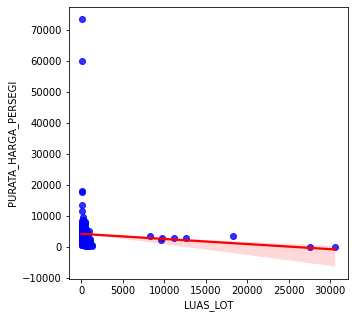

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.regplot(x='LUAS_LOT',  y='PURATA_HARGA_PERSEGI', data=avgArea, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

## Predictive Question

"Will the property net price increase as the years increase?"

In [ ]:
df2

,STATE,DAERAH1,TKH_NILAI,UNIT_LUAS_LOT,LUAS_LOT,CATEGORY,SECTOR,PRO_TYPE,B_TINGKAT,ALAMAT,SKIM,SYER1,HARGA_B,YEAR,HARGA_PERSEGI
1,Kuala Lumpur,Mukim Setapak,2021-02-08,mp,125.0,Condominium/Apartment,Residential,Condominium/Apartment,20.0,"B-04-06,JLN WANGSA PERDANA 3",DESA PUTRA,1,10000,2021,80.00
10,Kuala Lumpur,Mukim Setapak,2017-03-03,mp,52.0,Flat,Residential,Flat,5.0,"8-1-29,OFF JALAN GOMBAK",PANGSAPURI BANDARAYA GOMBAK,1,22000,2017,423.08
11,Kuala Lumpur,Mukim Setapak,2017-01-20,mp,39.0,Low-Cost Flat,Residential,Low-Cost Flat,17.0,"162-14A,JALAN SENTUL",PERUMAHAN AWAM SERI KELANTAN,1,22600,2017,579.49
12,Kuala Lumpur,Mukim Setapak,2017-10-02,mp,39.0,Low-Cost Flat,Residential,Low-Cost Flat,17.0,"162-5D,JALAN SENTUL",PERUMAHAN AWAM SERI KELANTAN,1,22600,2017,579.49
13,Kuala Lumpur,Mukim Setapak,2017-04-20,mp,39.0,Low-Cost Flat,Residential,Low-Cost Flat,17.0,"160-1P,JALAN SENTUL",PERUMAHAN AWAM SERI KELANTAN,1,22600,2017,579.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33729,Kuala Lumpur,Mukim Setapak,2018-04-23,mp,9740.0,Vacant Residential Plot,Residential,Vacant Plot,0.0,"3163,JALAN SENTUL PASAR",JALAN SENTUL PASAR,1,27773325,2018,2851.47
33730,Kuala Lumpur,Mukim Setapak,2019-08-03,mp,8238.0,Vacant Residential Plot,Residential,Vacant Plot,0.0,"201438,JALAN DATO SENU",JALAN SENTUL,1,29000000,2019,3520.27
33732,Kuala Lumpur,Mukim Setapak,2018-04-23,mp,11200.0,Vacant Residential Plot,Residential,Vacant Plot,0.0,"4056,OFF JALAN SENTUL PASAR",JALAN SENTUL PASAR,1,31963505,2018,2853.88
33734,Kuala Lumpur,Mukim Setapak,2018-04-23,mp,12570.0,Vacant Residential Plot,Residential,Vacant Plot,0.0,"4055,JALAN SENTUL PASAR",JALAN SENTUL PASAR,1,35853440,2018,2852.30


In [ ]:
dfmodel =  dfYear
dfmodel

,YEAR,PURATA_HARGA_PERSEGI
0,2017,4206.41
1,2018,4007.54
2,2019,4408.58
3,2020,4336.08
4,2021,4275.42


Linear Regression

In [ ]:
X = dfmodel[['YEAR']]   # drop labels from original data
y = dfmodel[['PURATA_HARGA_PERSEGI']]  # copy the labels to another dataframe/series

In [ ]:
# checking the shape is a good practice to know that the information is correct
print(X.shape)
print(y.shape)

(5, 1)
(5, 1)


In [ ]:
#training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
# this fits the data to a linear regression model
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.coef_

array([[23.24576923]])

In [ ]:
reg.intercept_

array([-42668.32])

In [ ]:
#returns r^2 determination coefficient
reg.score(X_test, y_test)

0.061744530741992376

In [ ]:
#Make predictions on the price value
some_data = X_test.iloc[:5]    # take first 5 entries from X_test
predicted_price_values = reg.predict(some_data)
predicted_price_values

array([[4264.88807692],
       [4241.64230769]])

In [ ]:
#Actual price value
actual_price_values = y_test.iloc[:2].values     # here's the first 5 entries from y_test, which are the 'ground truth'
actual_price_values

array([[4408.58],
       [4007.54]])

In [ ]:
#Absolute difference between predicted and actual price value
np.abs(predicted_price_values-actual_price_values)

array([[143.69192308],
       [234.10230769]])

In [ ]:
#Amount of error made by trained model
from sklearn.metrics import mean_absolute_error
y_pred = reg.predict(X_test)
model_mae = mean_absolute_error(y_test, y_pred)
print(model_mae)

188.89711538461734


## Data Modelling

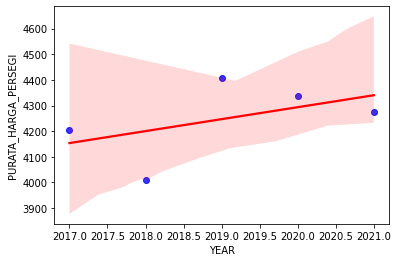

In [ ]:
#linear regression + plotting the scatter and regression line
sns.regplot(x="YEAR", y="PURATA_HARGA_PERSEGI", data=dfmodel, 
            scatter_kws={"color": "blue"}, line_kws={"color": "red"})

## Exploratory Question

"Which property type is the most prevalent in Mukim Setapak?"

In [ ]:
# Drop all columns with NaN values
df2=mukim_setapak.dropna(axis=1)
df2

,STATE,DAERAH1,TKH_NILAI,UNIT_LUAS_LOT,LUAS_LOT,CATEGORY,SECTOR,PRO_TYPE,B_TINGKAT,ALAMAT,SKIM,SYER1,HARGA_B,YEAR
1,Kuala Lumpur,Mukim Setapak,2021-02-08,mp,125.0,Condominium/Apartment,Residential,Condominium/Apartment,20.0,"B-04-06,JLN WANGSA PERDANA 3",DESA PUTRA,1,10000,2021
10,Kuala Lumpur,Mukim Setapak,2017-03-03,mp,52.0,Flat,Residential,Flat,5.0,"8-1-29,OFF JALAN GOMBAK",PANGSAPURI BANDARAYA GOMBAK,1,22000,2017
11,Kuala Lumpur,Mukim Setapak,2017-01-20,mp,39.0,Low-Cost Flat,Residential,Low-Cost Flat,17.0,"162-14A,JALAN SENTUL",PERUMAHAN AWAM SERI KELANTAN,1,22600,2017
12,Kuala Lumpur,Mukim Setapak,2017-10-02,mp,39.0,Low-Cost Flat,Residential,Low-Cost Flat,17.0,"162-5D,JALAN SENTUL",PERUMAHAN AWAM SERI KELANTAN,1,22600,2017
13,Kuala Lumpur,Mukim Setapak,2017-04-20,mp,39.0,Low-Cost Flat,Residential,Low-Cost Flat,17.0,"160-1P,JALAN SENTUL",PERUMAHAN AWAM SERI KELANTAN,1,22600,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33729,Kuala Lumpur,Mukim Setapak,2018-04-23,mp,9740.0,Vacant Residential Plot,Residential,Vacant Plot,0.0,"3163,JALAN SENTUL PASAR",JALAN SENTUL PASAR,1,27773325,2018
33730,Kuala Lumpur,Mukim Setapak,2019-08-03,mp,8238.0,Vacant Residential Plot,Residential,Vacant Plot,0.0,"201438,JALAN DATO SENU",JALAN SENTUL,1,29000000,2019
33732,Kuala Lumpur,Mukim Setapak,2018-04-23,mp,11200.0,Vacant Residential Plot,Residential,Vacant Plot,0.0,"4056,OFF JALAN SENTUL PASAR",JALAN SENTUL PASAR,1,31963505,2018
33734,Kuala Lumpur,Mukim Setapak,2018-04-23,mp,12570.0,Vacant Residential Plot,Residential,Vacant Plot,0.0,"4055,JALAN SENTUL PASAR",JALAN SENTUL PASAR,1,35853440,2018


In [ ]:
#extract certain column
df3=df2[['SKIM','PRO_TYPE', 'HARGA_B']]
df3 = df3.sort_values(by=['HARGA_B'],ascending=True)
df3

,SKIM,PRO_TYPE,HARGA_B
1,DESA PUTRA,Condominium/Apartment,10000
10,PANGSAPURI BANDARAYA GOMBAK,Flat,22000
11,PERUMAHAN AWAM SERI KELANTAN,Low-Cost Flat,22600
12,PERUMAHAN AWAM SERI KELANTAN,Low-Cost Flat,22600
13,PERUMAHAN AWAM SERI KELANTAN,Low-Cost Flat,22600
...,...,...,...
33729,JALAN SENTUL PASAR,Vacant Plot,27773325
33730,JALAN SENTUL,Vacant Plot,29000000
33732,JALAN SENTUL PASAR,Vacant Plot,31963505
33734,JALAN SENTUL PASAR,Vacant Plot,35853440


In [ ]:
num_pro = pd.value_counts(df['PRO_TYPE'])
num_pro

Condominium/Apartment             18361
2 - 2 1/2 Storey Terraced          4041
Low-Cost Flat                      3950
Flat                               3237
1 - 1 1/2 Storey Terraced          1182
Detached                            942
2 - 2 1/2 Storey Semi-Detached      606
Vacant Plot                         525
Town House                          395
Cluster House                       322
Low-Cost House                      128
1 - 1 1/2 Storey Semi-Detached       46
Others                                6
Name: PRO_TYPE, dtype: int64

In [ ]:
pro = {'Condominium/Apartment': 18361, '2 - 2 1/2 Storey Terraced':4041,'Low-Cost_Flat':3950,'Flat': 3237,'1-1_1/2_Storey Terraced':1182,'Detached':942,'2 - 2 1/2 Storey Semi-Detached':606,'Vacant Plot':525,'Town House':395,'Cluster House':322,'Low-Cost House':128,'1 - 1 1/2 Storey Semi-Detached':46,'others':6}
pro_name = list(pro.keys())
pro_number = list(pro.values())

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


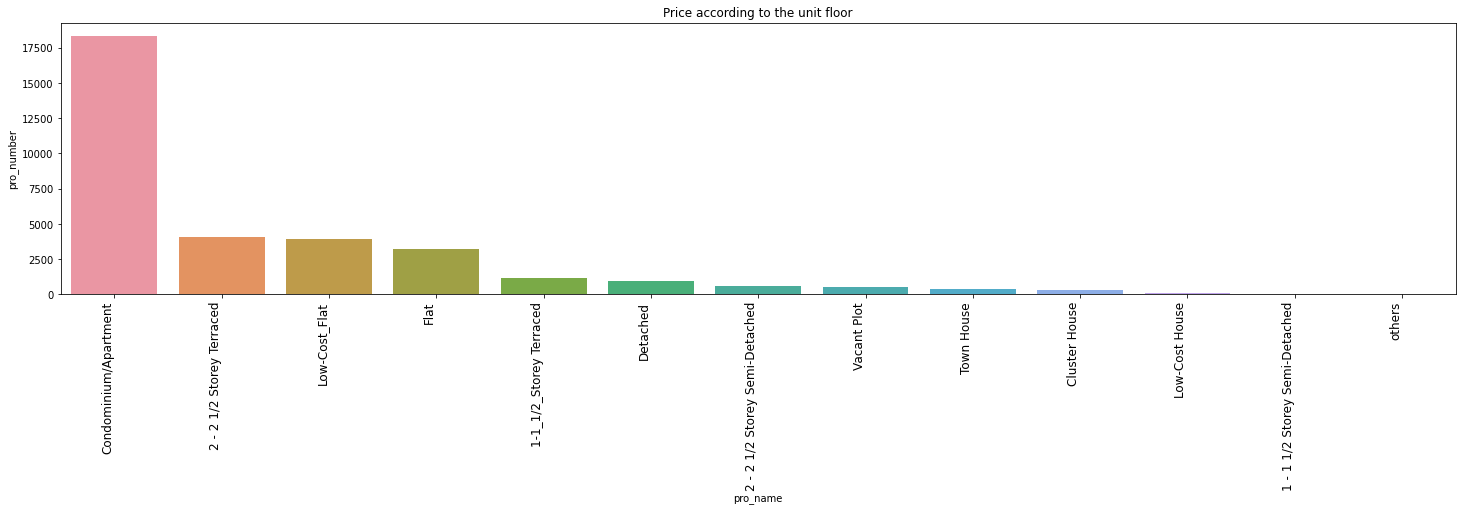

In [ ]:
plt.figure(figsize=(25,5))    
ax = sns.barplot(pro_name, pro_number,ci = None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=12)
ax.set(xlabel='pro_name', ylabel='pro_number')
plt.title('Price according to the unit floor')
plt.show()

## Data Mining

In [ ]:
df4=df2[['SKIM','PRO_TYPE', 'HARGA_B','YEAR']]
df4 = df4.sort_values(by=['YEAR','HARGA_B'],ascending=True)
df4

,SKIM,PRO_TYPE,HARGA_B,YEAR
10,PANGSAPURI BANDARAYA GOMBAK,Flat,22000,2017
11,PERUMAHAN AWAM SERI KELANTAN,Low-Cost Flat,22600,2017
12,PERUMAHAN AWAM SERI KELANTAN,Low-Cost Flat,22600,2017
13,PERUMAHAN AWAM SERI KELANTAN,Low-Cost Flat,22600,2017
40,PERUMAHAN AWAM SERI KELANTAN,Low-Cost Flat,27900,2017
...,...,...,...,...
30907,TMN IBU KOTA,Detached,1945000,2021
31913,WANGSA MELAWATI,Detached,2550000,2021
32220,JALAN MAKTAB AREA,Detached,2880000,2021
32374,JALAN MAKTAB AREA,Detached,3000000,2021


In [ ]:
print(df4.describe()['HARGA_B'])

count    5.429000e+03
mean     4.938156e+05
std      1.261436e+06
min      1.000000e+04
25%      2.300000e+05
50%      4.100000e+05
75%      5.400000e+05
max      6.197408e+07
Name: HARGA_B, dtype: float64


In [ ]:
#This shows the maximum price of property in every year between 2017 - 2021

In [ ]:
grouped_df4 = df4.groupby(['YEAR']).max()
print(grouped_df4['HARGA_B'])

YEAR
2017     4900000
2018    35853440
2019    61974077
2020     3600000
2021     3000000
Name: HARGA_B, dtype: int64


In [ ]:
#This shows minimum and maximim property price for each year between 2017 - 2021

In [ ]:
result = df2.groupby('YEAR').agg({'HARGA_B': ['min', 'max']})
print(result)

     HARGA_B          
         min       max
YEAR                  
2017   22000   4900000
2018   22600  35853440
2019   22600  61974077
2020   29500   3600000
2021   10000   3000000


In [ ]:
#This shows the minimum and maximum price for every property type in in the range of 2017 - 2021

In [ ]:
result2 = df2.groupby('PRO_TYPE').agg({'HARGA_B': ['min', 'max']})
print(result2)

                               HARGA_B          
                                   min       max
PRO_TYPE                                        
1 - 1 1/2 Storey Semi-Detached  200000   1400000
1 - 1 1/2 Storey Terraced        70000   1000000
2 - 2 1/2 Storey Semi-Detached  700000   3580000
2 - 2 1/2 Storey Terraced       130000   2200000
Cluster House                    47000    450000
Condominium/Apartment            10000   2136888
Detached                        120000   4900000
Flat                             22000    410000
Low-Cost Flat                    22600    280000
Low-Cost House                  320000    650000
Others                          600000    600000
Town House                      150000   3580000
Vacant Plot                      40000  61974077
